In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR,Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [56]:
from sklearn.datasets import load_boston
# boston = load_boston()
df = pd.read_csv("scores_full.csv")
df2 = pd.read_csv("5_days_sleep_pattern_1.csv")
df2 = df2.drop(["Unnamed: 0", "Id"], 1)
df = df.drop(["Unnamed: 0", "days", "inpatient"], 1)
df = df.join(df2)
X = df.drop("Id", 1)       # feature matrix
y = df['Id']               # target feature

C:\Users\ksd04\AppData\Local\Temp\ipykernel_31504\547342578.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(["Unnamed: 0", "Id"], 1)
C:\Users\ksd04\AppData\Local\Temp\ipykernel_31504\547342578.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Unnamed: 0", "days", "inpatient"], 1)
C:\Users\ksd04\AppData\Local\Temp\ipykernel_31504\547342578.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Id", 1)       # feature matrix


In [57]:
features = X.columns
features

Index(['gender', 'age', 'afftype', 'melanch', 'edu', 'marriage', 'work',
       'madrs1', '5days_sleep_time_activity', '5days_day_time_activity'],
      dtype='object')

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5,test_size =0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 10)
(11, 10)
(44,)
(11,)


In [59]:
# Lets apply the Lasso Model -- in Linear Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [60]:
coeff = lasso.coef_
coeff

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.24720097e-02,
        1.44646340e-06,  3.40750264e-07])

In [61]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
7,madrs1,-4.247201e-02
0,gender,-0.000000e+00
1,age,-0.000000e+00
2,afftype,-0.000000e+00
3,melanch,-0.000000e+00
4,edu,-0.000000e+00
5,marriage,0.000000e+00
6,work,-0.000000e+00
9,5days_day_time_activity,3.407503e-07
8,5days_sleep_time_activity,1.446463e-06


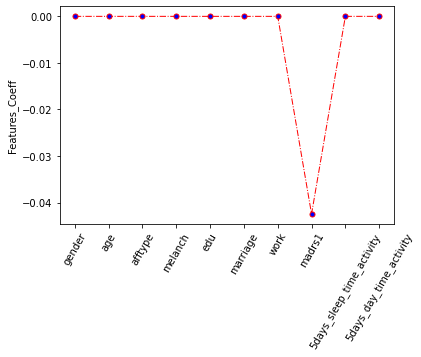

In [62]:
# Lets plot the coeff with features
plt.plot(range(len(features)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<AxesSubplot:xlabel='features', ylabel='coeff'>

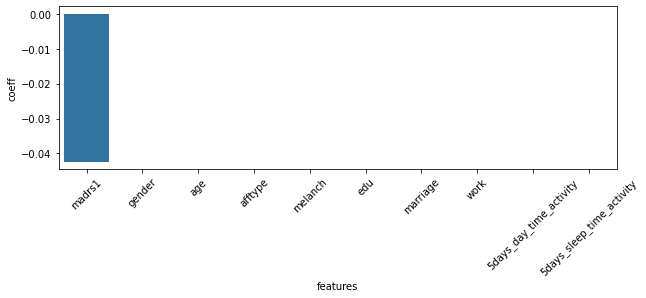

In [63]:
# Use Bar chart to show coeff
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)